# Tarea Semanal 2
## Martín Deleón

### Consignas:

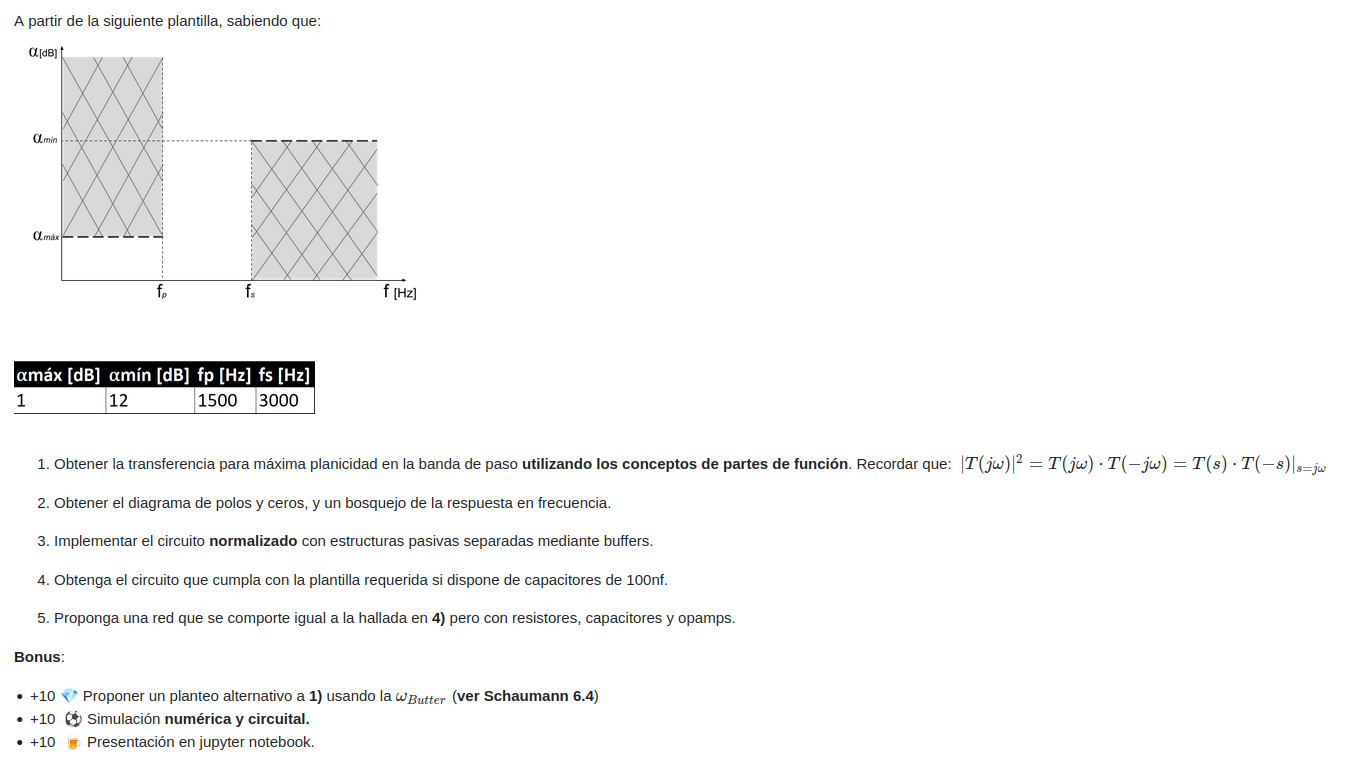



### 1. Busqueda de la función transferencia

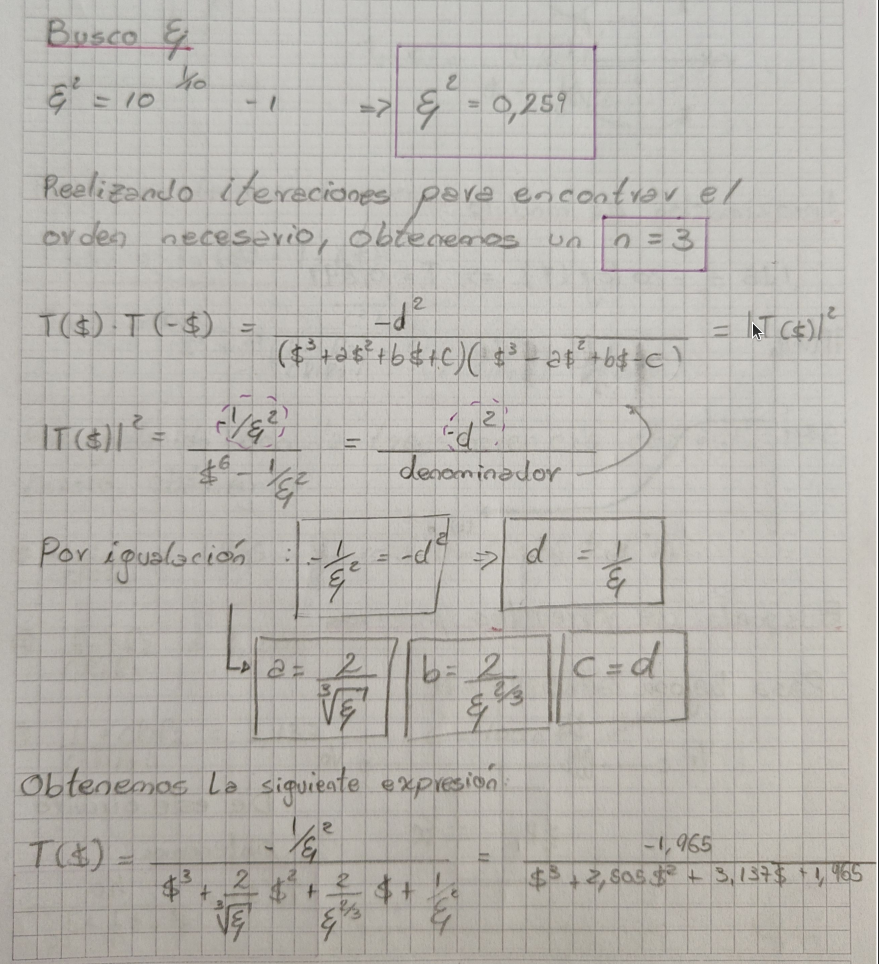

### 2. Diagrama de polos y ceros

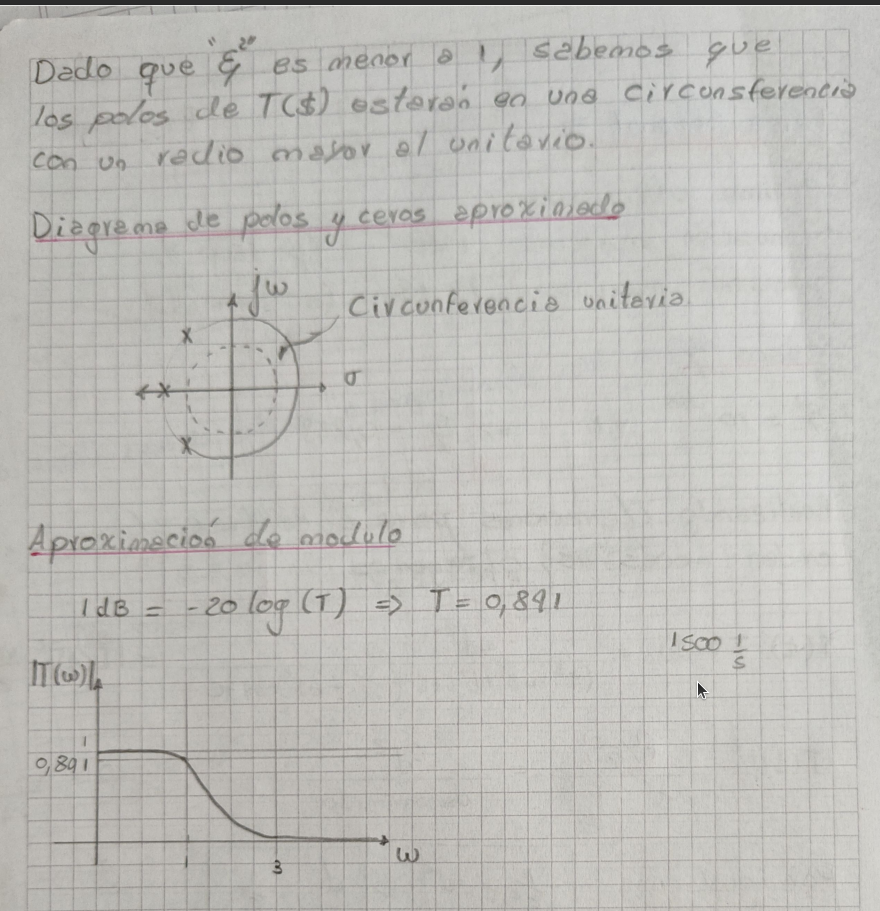

En este punto es destacable notar que la circunferencia en donde se encontraran los polos de esta transferencia sera mayor a la unitaria. Esto nos permite verificar si estamos yendo por un buen camino o si tenemos algun error anterior. Contrastamos el diagrama de polos y ceros con las simulaciones para volver a verificar. 

In [ ]:
# Módulos para Python, algo parecido a los #include de C

# módulos numéricos y de funciones científicas
import numpy as np
from scipy import signal as sig

# PyTC2: La librería para TC2
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys

import matplotlib as mpl
import math
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento

plt.figure(1)
plt.close(1)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# Podés modificar el ancho y alto de los gráficos que generás
fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
# módulos numéricos y de funciones científicas
import numpy as np
from scipy import signal as sig

# Ahora importamos las funciones de PyTC2
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys

from pytc2.general import print_subtitle
from IPython.display import IFrame
IFrame("./sos_pb_lapiz.pdf", width=1000, height=1000)

TransferFunctionContinuous(
array([1.965]),
array([1.        , 2.50503252, 3.13759397, 1.965     ]),
dt: None
)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[1,
  array([<Axes: title={'center': 'Magnitude response'}, ylabel='Magnitude [dB]'>,
         <Axes: title={'center': 'Phase response'}, xlabel='Angular frequency [rad/sec]', ylabel='Phase [rad]'>],
        dtype=object)],
 [2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>],
 [3, ()],
 [4,
  <Axes: title={'center': 'Group delay'}, xlabel='Angular frequency [rad/sec]', ylabel='Group Delay [sec]'>]]

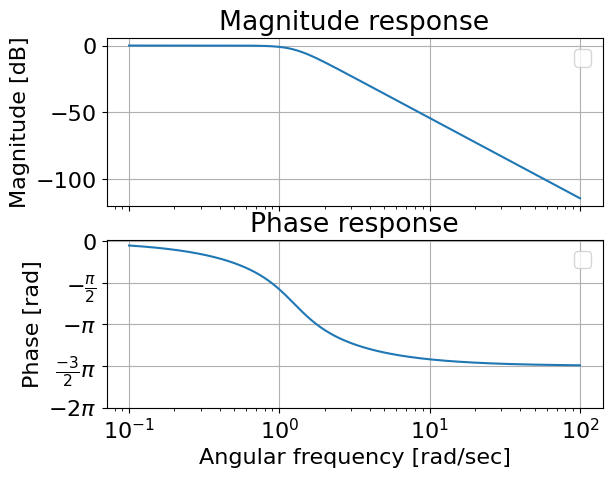

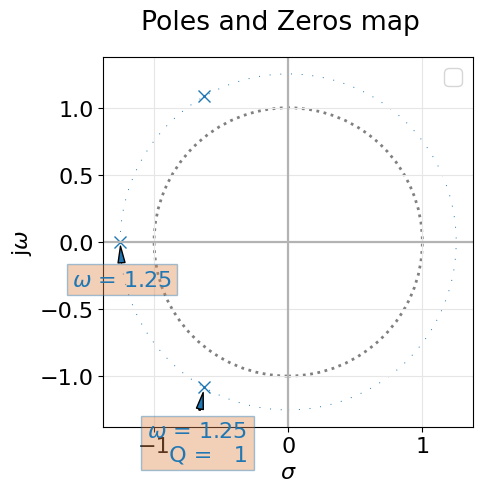

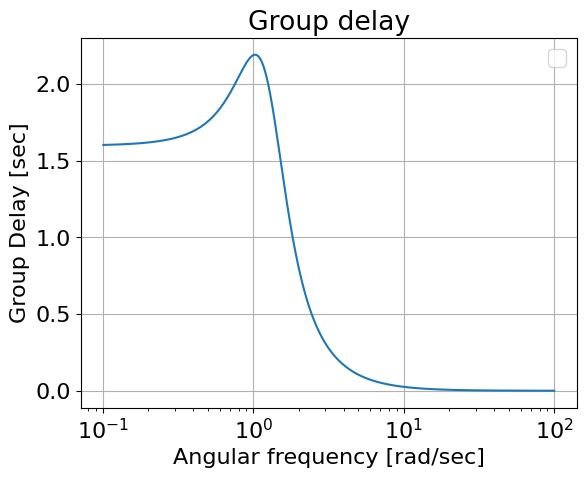

In [25]:
R1 = 1
R2 = 1/(math.sqrt(2))
A = 1/R2
R3 = 1
C = 1/R3

K = R3/R1   #Ganancia del filtro
W = 1/(C*R3)   #Frecuencia angular al cuadrado normalizada
Q = R2/R3
num=np.array([1.965])
den=np.array([1,2.505032521, 3.137593965, 1.965])


#Buscamos la transferencia
H=sig.TransferFunction(num,den)
display(H)

analyze_sys([H], [''], annotations = True)

#_, axes_hdl = bodePlot(H)

#plt.sca(axes_hdl[0])


#pzmap(H)


Dado que la transferencia simulada coincide con lo esperado, procedemos a continuar la tarea.

### 3. Implementación mediante circuitos pasivos

Proponemos utilizar los siguientes circuitos para obtener el filtro pedido.

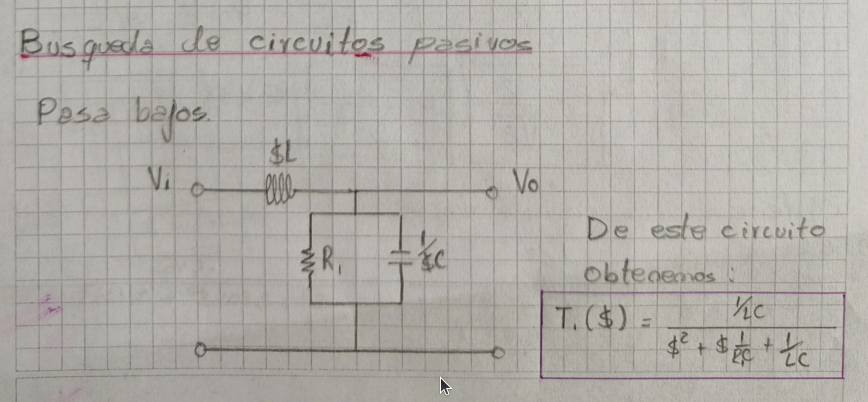

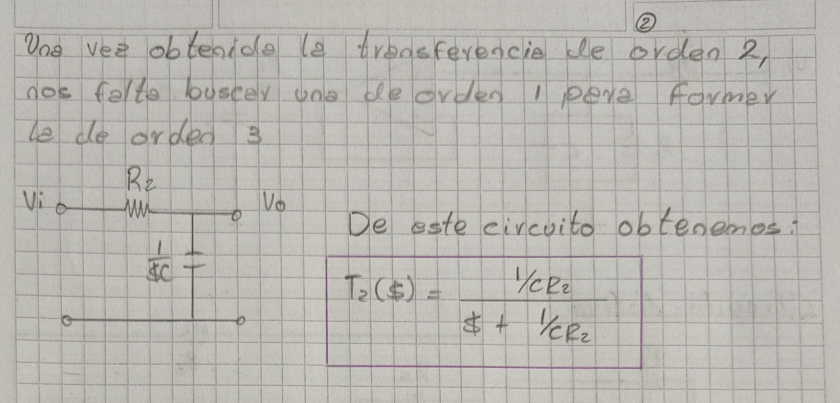

Una vez definidos los circuitos a utilizar debemos combinarlos, para ello se utiliza un buffer, de esta manera no se pierde la ubicación de los polos de cada circuito.

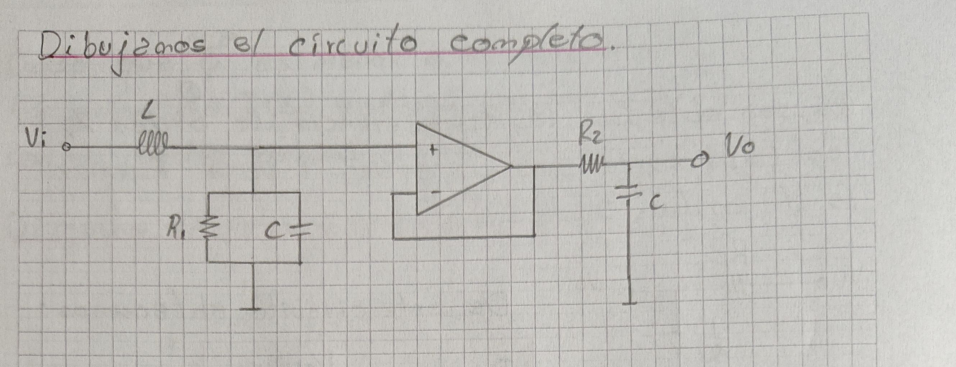


#### Transferencia obtenida

Para obtener la transferencia de este circuito simplemente nos queda multiplicar las transferencias obtenidas anteriormente. De esta manera llegamos a la siguiente expresión:

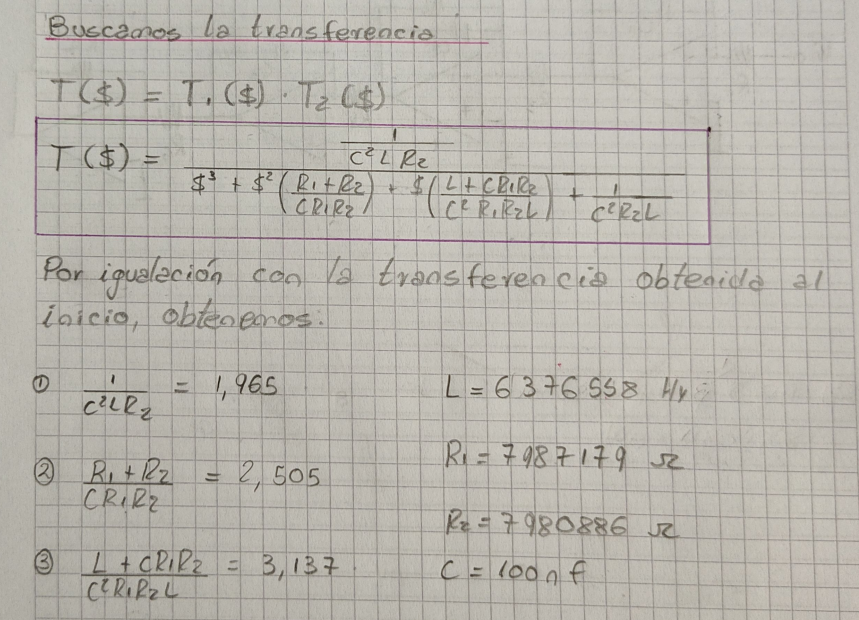

Por igualación con la expresion necesitada, podemos encontrar los valores de los componentes. En este caso los valores dieron algo raros dado que el inductor es muy grande, por ende supongo que se cometió un error en alguna parte del procedimiento.

### 4 Implementación mediante circuitos activos

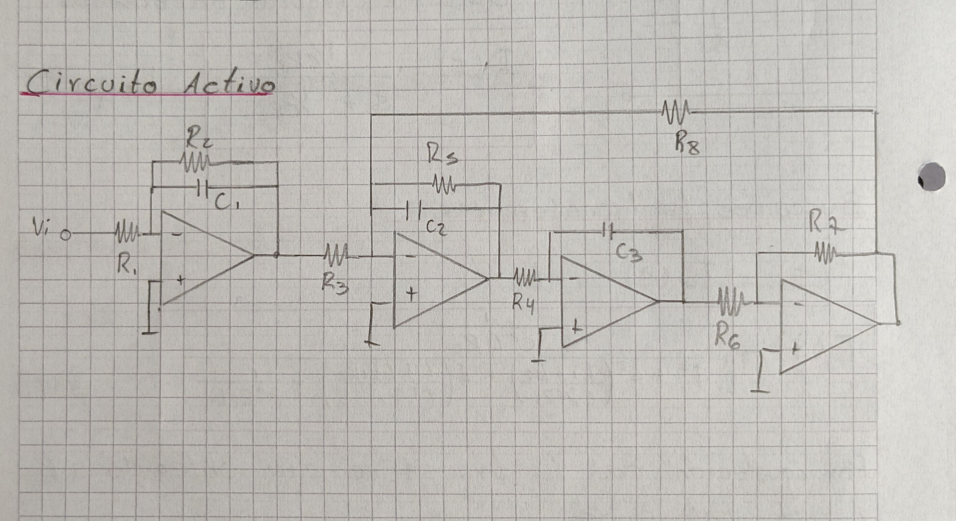

Podemos ver un primer integrador que se encarga de formar el primer polo y luego una estructura que conforma un filtro pasa bajos de orden dos. Mediante el ajuste de los componentes se puede llegar a la transferencia deseada.